In [19]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

/home/proctor/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:

# df = pd.read_excel('datos_avance.xlxs', sheet_name=None)
df = pd.read_excel('datos_avance.xlsx') 
df.head()


In [21]:
dfname=pd.ExcelFile('datos_avance.xlsx')
print(dfname.sheet_names)


['acuerdos', 'payment_params', 'pagos', 'asignacion_fdem', 'resumen_creditos', 'gestiones_2022']


In [27]:
df_acuerdos =pd.read_excel(f'datos_avance.xlsx',sheet_name='acuerdos')
df_acuerdos.head()

,FechaCaptura,Credito,FechaAPagar,VRCancelar,PuntoPago,TipoPago,Asesor,VrTotalObligacion,VrTotalNegociado,Condonacion,TipoPago2,Cuotas,VrCuota1,VrOtrasCuotas,CuotaNumero,Estado,FechaPago
0,2016-11-08,904141001352,2016-11-30,100000,CDS o Efecty,Pago Parcial,Si,0,0,0,NaN,0,0,0,0,NaN,1900-01-01
1,2016-11-23,904141001295,2016-12-21,260000,Oficina Fundaci¢n de la Mujer,Pago Parcial con Condonaci¢n,Si,0,0,0,NaN,0,0,0,0,NaN,1900-01-01
2,2016-11-28,904141000816,2016-12-15,844000,Oficina Fundaci¢n de la Mujer,Pago Parcial con Condonaci¢n,NaN,0,0,0,NaN,0,0,0,0,NaN,1900-01-01
3,2016-11-19,904141000465,2016-11-30,75000,CDS o Efecty,Pago Parcial con Condonaci¢n,NaN,0,0,0,NaN,0,0,0,0,NaN,1900-01-01
4,2016-11-09,904141000343,2016-11-30,55000,CDS o Efecty,Pago Parcial con Condonaci¢n,NaN,0,0,0,NaN,0,0,0,0,NaN,1900-01-01


In [32]:
df_acuerdos.to_csv("acuerdos.csv",index=False)

In [26]:
df_payment_params =pd.read_excel(f'datos_avance.xlsx',sheet_name='payment_params')
df_payment_params.head()

,id,user_id,credit_number,value,description,pay_location_id,on_site,agreement_type_id,date,time,active,confirmed_user,confirmed_found,accesed_at,created_at,updated_at
0,2,1,641131002666,15000,NaN,1,0,1,\N,\N,0,0,0,\N,2017-02-28 19:05:29,2017-03-01 09:39:56
1,3,16,1490,200000,transcurso del dia,1,0,4,\N,\N,0,0,0,\N,2017-03-01 08:08:31,2017-03-01 09:35:55
2,4,16,1676,1420000,cancela en 15 minutos.,1,0,4,\N,\N,0,0,0,\N,2017-03-01 08:20:07,2017-03-01 09:35:04
3,5,21,614151006615,98000,cancelara en el transcurso del dia,1,0,3,\N,\N,0,0,0,\N,2017-03-01 08:50:36,2017-03-01 09:36:38
4,6,1,822141001963,1980000,NaN,1,0,1,\N,\N,0,0,0,\N,2017-03-01 08:54:19,2017-03-01 09:40:45


In [34]:
df_payment_params.to_csv("payment_params.csv",index=False)

In [28]:
df_pagos =pd.read_excel(f'datos_avance.xlsx',sheet_name='pagos')
df_pagos.head()

,MesCargue,Codigo,Agencia,Credito,Estado,SaldoFindeMes,DiasMoraFindeMes,SaldoActual,DiasmoraActual,FechaValor,...,MORA,PAGOSOTROS,TotalCancelado,VRgoech,CONDCAPITAL,CONDINTERES,CONDMORA,DiasMoraPago,Reverso,Concepto
0,2016-10,101,BUCARAMANGA AGENCIA PRINCIPAL,101101002728,Castigado,321631,2032,0,0,2016-10-18,...,0,10556,332187,321631,0,0,594634,2050,NaN,NaN
1,2016-10,101,BUCARAMANGA AGENCIA PRINCIPAL,101104101267,Castigado,149159,2142,0,0,2016-10-31,...,0,4182,153341,149159,0,3498,356515,2172,NaN,NaN
2,2016-10,101,BUCARAMANGA AGENCIA PRINCIPAL,101131041847,Castigado,384108,490,0,0,2016-10-20,...,0,9799,393907,384108,0,20307,233846,510,NaN,NaN
3,2016-10,102,BUCARAMANGA AGENCIA ASTURIAS,102141028221,Castigado,291780,706,0,0,2016-10-21,...,0,20420,312200,291780,0,30678,226165,727,NaN,NaN
4,2016-10,102,BUCARAMANGA AGENCIA ASTURIAS,102141028298,Castigado,1363613,803,1322611,803,2016-10-18,...,0,12549,100000,87451,0,0,52487,821,NaN,NaN


In [33]:
df_pagos.to_csv("pagos.csv",index=False)

In [29]:
df_asignacion_fdem =pd.read_excel(f'datos_avance.xlsx',sheet_name='asignacion_fdem')
df_asignacion_fdem.head()

,obligacion,Titular,agencia,tipo,primera_asignacion,fecha_asignacion,fecha_desasignacion,nombre,ciudad,tel_casa,...,inter_corri,inter_mora,hyc,seguro,iva,valor_cuota,nro_cuotas_atrasadas,cuotas_canceladas,cuotas_vencidas,vigente
0,201917264,1,201,MANTENIDO,2016-10-01,2016-10-01,2019-07-22 00:00:00,SALAZAR ECHAVARRIA CARMEN ADRIANA,CUCUTA,75702725,...,29994,2397521,0,0,0,0,8,2,6,0
1,10191142053,2,101,MANTENIDO,2016-10-01,2016-10-01,2019-07-22 00:00:00,GONZALEZ GONZALEZ EFRAIN,BUCARAMANGA,76731342,...,0,118354,0,0,0,0,12,11,1,0
2,10191144858,3,101,MANTENIDO,2016-10-01,2016-10-01,2019-07-22 00:00:00,LANDAZABAL SANTANDER MILENA,BUCARAMANGA,76417311,...,10928,1297810,0,0,0,0,8,4,4,0
3,10191146050,4,101,MANTENIDO,2016-10-01,2016-10-01,2019-07-22 00:00:00,ESTUPIÑAN LOPEZ ARMANDO,BUCARAMANGA,76710070,...,20805,1987240,0,0,0,0,8,3,5,0
4,10191150337,5,101,MANTENIDO,2016-10-01,2016-10-01,2020-07-03 00:00:00,OSMA MARTHA ADELINA,BUCARAMANGA,76732213,...,66677,4464796,2125,0,340,0,14,6,8,0


In [30]:
df_resumen_creditos =pd.read_excel(f'datos_avance.xlsx',sheet_name='resumen_creditos')
df_resumen_creditos.head()


,credito,fecha_primera_asignacion,fecha_desasignacion,fecha_entrega,ultima_entrega,tipo,fecha_castigo,fecha_desembolso,capital_desembolso,cuotas_aprobadas,...,garantes,dir_domicilio_garante,dir_negocio_garante,tel_celular_garante,tel_casa_garante,tel_negocio_garante,tel_fijo_garante,tarea_asignada,f_proceso,hora_contactar
0,628131002696,2019-12-05,2022-08-11 00:00:00,2022-03-09,2022-08-11 00:00:00,\N,2016-10-01,2013-12-16 00:00:00,1780245,0,...,\N,\N,\N,\N,\N,\N,\N,NaN,2022-10-04 10:05:08,\N
1,402911602288,2019-07-19,2019-08-31 00:00:00,2019-07-19,2022-02-18 00:00:00,\N,2016-10-01,2007-02-28 00:00:00,10800000,0,...,\N,\N,\N,\N,\N,\N,\N,NaN,2022-10-04 10:05:08,\N
2,619131006104,2016-10-01,2020-07-03 00:00:00,2016-10-01,2022-02-18 00:00:00,\N,2016-10-01,2013-11-28 00:00:00,1075100,0,...,\N,\N,\N,\N,\N,\N,\N,NaN,2022-10-04 10:05:08,\N
3,209131030884,2016-10-01,2019-07-22 00:00:00,2016-10-01,2022-02-18 00:00:00,\N,2016-10-01,2013-11-19 00:00:00,1690000,0,...,\N,\N,\N,\N,\N,\N,\N,NaN,2022-10-04 10:05:08,\N
4,623171011326,2019-07-19,2022-03-09 00:00:00,2019-07-19,2022-02-18 00:00:00,\N,2019-06-29,2017-01-27 00:00:00,8035240,0,...,\N,\N,\N,\N,\N,\N,\N,NaN,2022-10-04 10:05:08,\N


In [31]:
df_gestiones_2022 =pd.read_excel(f'datos_avance.xlsx',sheet_name='gestiones_2022')
df_resumen_gestiones_2022.head()



NameError: name 'df_resumen_gestiones_2022' is not defined

In [9]:
df.columns

Index(['FechaCaptura', 'Credito', 'FechaAPagar', 'VRCancelar', 'PuntoPago',
       'TipoPago', 'Asesor', 'VrTotalObligacion', 'VrTotalNegociado',
       'Condonacion', 'TipoPago2', 'Cuotas', 'VrCuota1', 'VrOtrasCuotas',
       'CuotaNumero', 'Estado', 'FechaPago'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2643 entries, 0 to 2642
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FechaCaptura       2643 non-null   datetime64[ns]
 1   Credito            2643 non-null   int64         
 2   FechaAPagar        2643 non-null   datetime64[ns]
 3   VRCancelar         2643 non-null   int64         
 4   PuntoPago          2643 non-null   object        
 5   TipoPago           2640 non-null   object        
 6   Asesor             324 non-null    object        
 7   VrTotalObligacion  2643 non-null   int64         
 8   VrTotalNegociado   2643 non-null   int64         
 9   Condonacion        2643 non-null   int64         
 10  TipoPago2          0 non-null      float64       
 11  Cuotas             2643 non-null   int64         
 12  VrCuota1           2643 non-null   int64         
 13  VrOtrasCuotas      2643 non-null   int64         
 14  CuotaNum

<AxesSubplot:>

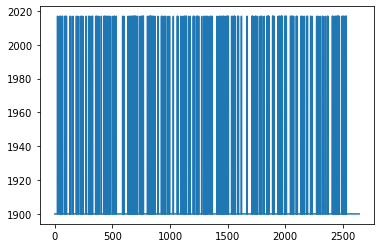

In [13]:
df['FechaPago'].plot()

In [16]:
df['FechaPago'].nunique().value_counts()

AttributeError: 'int' object has no attribute 'value_counts'

In [ ]:
x = df['FechaPago']

